<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

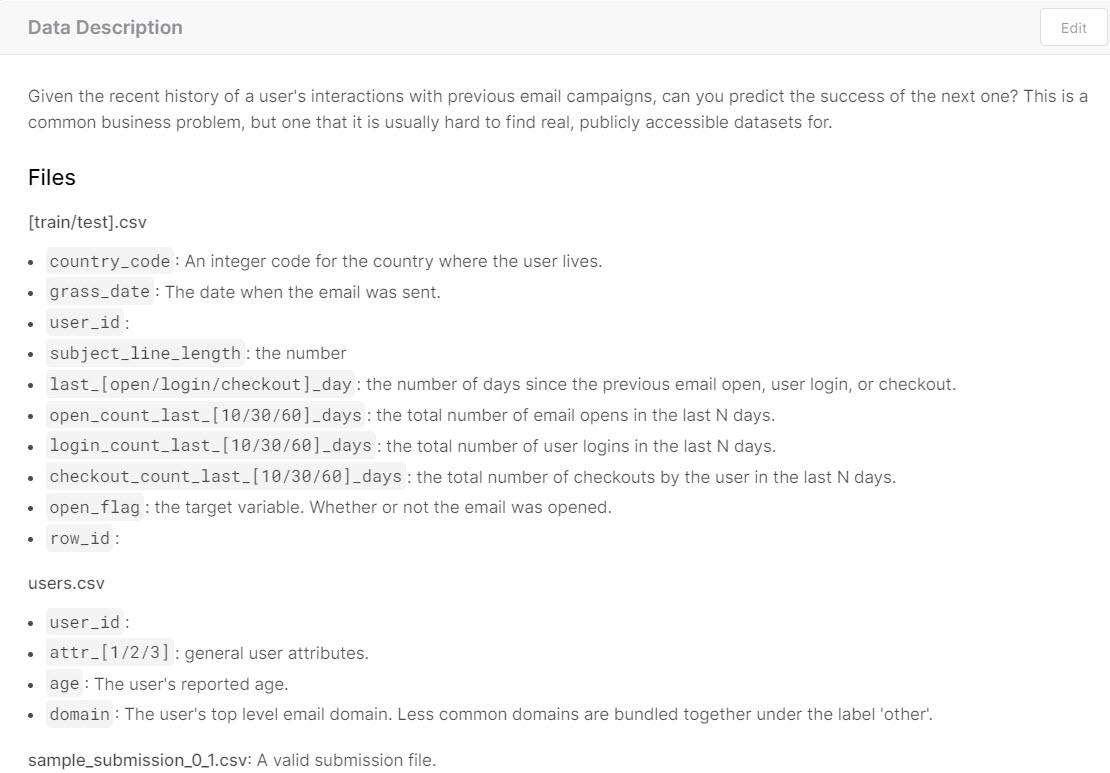

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

<h2><center>Model Training & Testing</center><h2>

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plot matplotlib graph
%matplotlib inline

#=========================================================================
# Next, we will import the required modules. Then we will define a generic 
# classification function, which takes a model as input and determines the 
# Accuracy and Cross-Validation scores.
#=========================================================================

#Import models from scikit learn module:
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
from sklearn.externals import joblib

from sklearn.exceptions import DataConversionWarning
from warnings import simplefilter
import warnings

# ignore all DataConversionWarning warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

simplefilter(action='ignore', category=FutureWarning)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Reading dataset

In [2]:
#=========================================================================
# Read train data using pandas and first 5 rows of data
#=========================================================================

xls1    = pd.ExcelFile('data/X_train_scaled_dataset7.xlsx')
X_train = pd.read_excel(xls1, 'X_train_scaled')
y_train = pd.read_excel(xls1, 'y_train')

xls2    = pd.ExcelFile('data/X_test_scaled_dataset7.xlsx')
X_test  = pd.read_excel(xls2, 'X_test_scaled')
y_test  = pd.read_excel(xls2, 'y_test')

dataset = X_train
dataset['open_flag'] = y_train['open_flag']
X_train = X_train.drop(['open_flag'], axis=1)

X_train.head()

,attr_3,age,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,-1.037198,-0.096900,-0.628901,-0.313685,-0.350077,1.864512,-0.725871,0.478914,1.238741,0.563516,...,-0.28309,-0.054146,-0.153324,-0.675130,1.966797,-0.461336,-0.38418,-0.309754,-0.232504,-0.200289
1,-0.061743,0.101742,0.179796,-0.366636,-0.350077,-0.604219,-0.315830,0.162457,-0.144960,0.563516,...,-0.28309,-0.054146,-0.153324,1.481196,-0.508441,-0.461336,-0.38418,-0.309754,-0.232504,-0.200289
2,0.913712,-0.891468,0.898639,-0.362854,-0.350077,1.864512,0.094212,-0.470457,-0.237207,0.715315,...,-0.28309,-0.054146,-0.153324,-0.675130,-0.508441,2.167618,-0.38418,-0.309754,-0.232504,-0.200289
3,-0.061743,0.300385,-0.269480,-0.234258,-0.257301,-0.595539,-0.725871,-0.786914,-0.790687,-0.271381,...,-0.28309,-0.054146,-0.153324,1.481196,-0.508441,-0.461336,-0.38418,-0.309754,-0.232504,-0.200289
4,-1.037198,-0.096900,-0.089770,-0.366636,0.922281,1.864512,0.914294,1.111828,1.607728,-0.650879,...,-0.28309,-0.054146,-0.153324,-0.675130,-0.508441,2.167618,-0.38418,-0.309754,-0.232504,-0.200289


<h3>Define Functions<h3>

In [3]:
#Generic function for making a classification model and accessing performance:

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [4]:
#-----------------------------------------------------------------
# Function for Random Decision Tree, Decision Tree CLassifier, 
# Random Forest Classifier and Gradient Boosting CLassifier
#-----------------------------------------------------------------
def classification_model_Test(model, X_train, y_train, X_test, y_test):
  #Fit the model:
  
  model.fit(X_train,y_train)

  print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
  print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))  
    
  #Make predictions on training set:
  predictions = model.predict(X_test)
     
  # Get performance metrics
  cm = confusion_matrix(y_test,predictions)
  print(metrics.classification_report(y_test,predictions))
  score = compute_score(clf=model, X=X_test, y=y_test, scoring='accuracy')
  r2_score = metrics.r2_score(y_test,predictions)
  
  # Print performance metrics

  print ('*************************************************************')
  print ('Metric Performance of : {0}\n'.format(model.__class__))
  print('Confusion Matrix : \n', cm)
  print ('Cross Validation Score = {0:.3%}\n'.format(score))
  print ("Coefficient of determination:{0:.3f}".format(r2_score))
   
  #Fit the model again so that it can be refered outside the function:
  model.fit(X_train,y_train) 

In [5]:
#-----------------------------------------------------------------
# Function for Validation data testing
#-----------------------------------------------------------------
def classification_model_Val(model, X_val, y_val):
  
  print("Accuracy on training set: {:.3f}".format(model.score(X_val, y_val)))
  #Make predictions on training set:
  predictions = model.predict(X_val)
     
  # Get performance metrics
  cm = confusion_matrix(y_val,predictions)
  print(metrics.classification_report(y_val,predictions))
  score = compute_score(clf=model, X=X_val, y=y_val, scoring='accuracy')
  r2_score = metrics.r2_score(y_val,predictions)
  
  # Print performance metrics

  print ('*************************************************************')
  print ('Metric Performance of : {0}\n'.format(model.__class__))
  print('Confusion Matrix : \n', cm)
  print ('Cross Validation Score = {0:.3%}\n'.format(score))
  print ("Coefficient of determination:{0:.3f}".format(r2_score))


In [6]:
# Checking on the feature importance weightage
from sklearn.metrics import confusion_matrix

def features_importance(clf, data, predictors, outcome):
    target = data[outcome]
    train = data[predictors]

    clf = clf.fit(train,target)
    
    features = pd.DataFrame()
    features['feature'] = train.columns
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    print ('*************************************************************')
    features.plot(title = 'Features Importance',fontsize= 8, kind='barh', figsize=(50, 10))
    featimp = pd.Series(clf.feature_importances_, index=predictors).sort_values(ascending=False)
    print (featimp)
    print('\n**********************************************************')

<h2><center>Create Model and test</center><h2>

In [7]:
outcome_var = 'open_flag'
predictor_var = X_train.columns

In [8]:
outcome_var

'open_flag'

In [9]:
predictor_var

Index(['attr_3', 'age', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'weekday',
       'domain_@gmail.com', 'domain_@hotmail.com', 'domain_@outlook.com',
       'domain_@yahoo.com', 'domain_@ymail.com', 'domain_other',
       'country_code_1', 'country_code_2', 'country_code_3', 'country_code_4',
       'country_code_5', 'country_code_6', 'country_code_7'],
      dtype='object')

In [10]:
X_train.count()

attr_3                         100574
age                            100574
subject_line_length            100574
last_open_day                  100574
last_login_day                 100574
last_checkout_day              100574
open_count_last_10_days        100574
open_count_last_30_days        100574
open_count_last_60_days        100574
login_count_last_10_days       100574
login_count_last_30_days       100574
login_count_last_60_days       100574
checkout_count_last_10_days    100574
checkout_count_last_30_days    100574
checkout_count_last_60_days    100574
weekday                        100574
domain_@gmail.com              100574
domain_@hotmail.com            100574
domain_@outlook.com            100574
domain_@yahoo.com              100574
domain_@ymail.com              100574
domain_other                   100574
country_code_1                 100574
country_code_2                 100574
country_code_3                 100574
country_code_4                 100574
country_code

In [11]:
X_test.count()

attr_3                         12417
age                            12417
subject_line_length            12417
last_open_day                  12417
last_login_day                 12417
last_checkout_day              12417
open_count_last_10_days        12417
open_count_last_30_days        12417
open_count_last_60_days        12417
login_count_last_10_days       12417
login_count_last_30_days       12417
login_count_last_60_days       12417
checkout_count_last_10_days    12417
checkout_count_last_30_days    12417
checkout_count_last_60_days    12417
weekday                        12417
domain_@gmail.com              12417
domain_@hotmail.com            12417
domain_@outlook.com            12417
domain_@yahoo.com              12417
domain_@ymail.com              12417
domain_other                   12417
country_code_1                 12417
country_code_2                 12417
country_code_3                 12417
country_code_4                 12417
country_code_5                 12417
c

<h3>Random Forest Classifier<h3>

Accuracy on training set: 1.000
Accuracy on test set: 0.971
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6227
           1       0.95      1.00      0.97      6190

    accuracy                           0.97     12417
   macro avg       0.97      0.97      0.97     12417
weighted avg       0.97      0.97      0.97     12417

*************************************************************
Metric Performance of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Confusion Matrix : 
 [[5897  330]
 [  29 6161]]
Cross Validation Score = 83.692%

Coefficient of determination:0.884
*************************************************************
open_count_last_10_days        0.133185
open_count_last_30_days        0.121624
open_count_last_60_days        0.104828
last_open_day                  0.098958
subject_line_length            0.062114
last_login_day                 0.061030
login_count_last_60_days       0.050052
last_chec

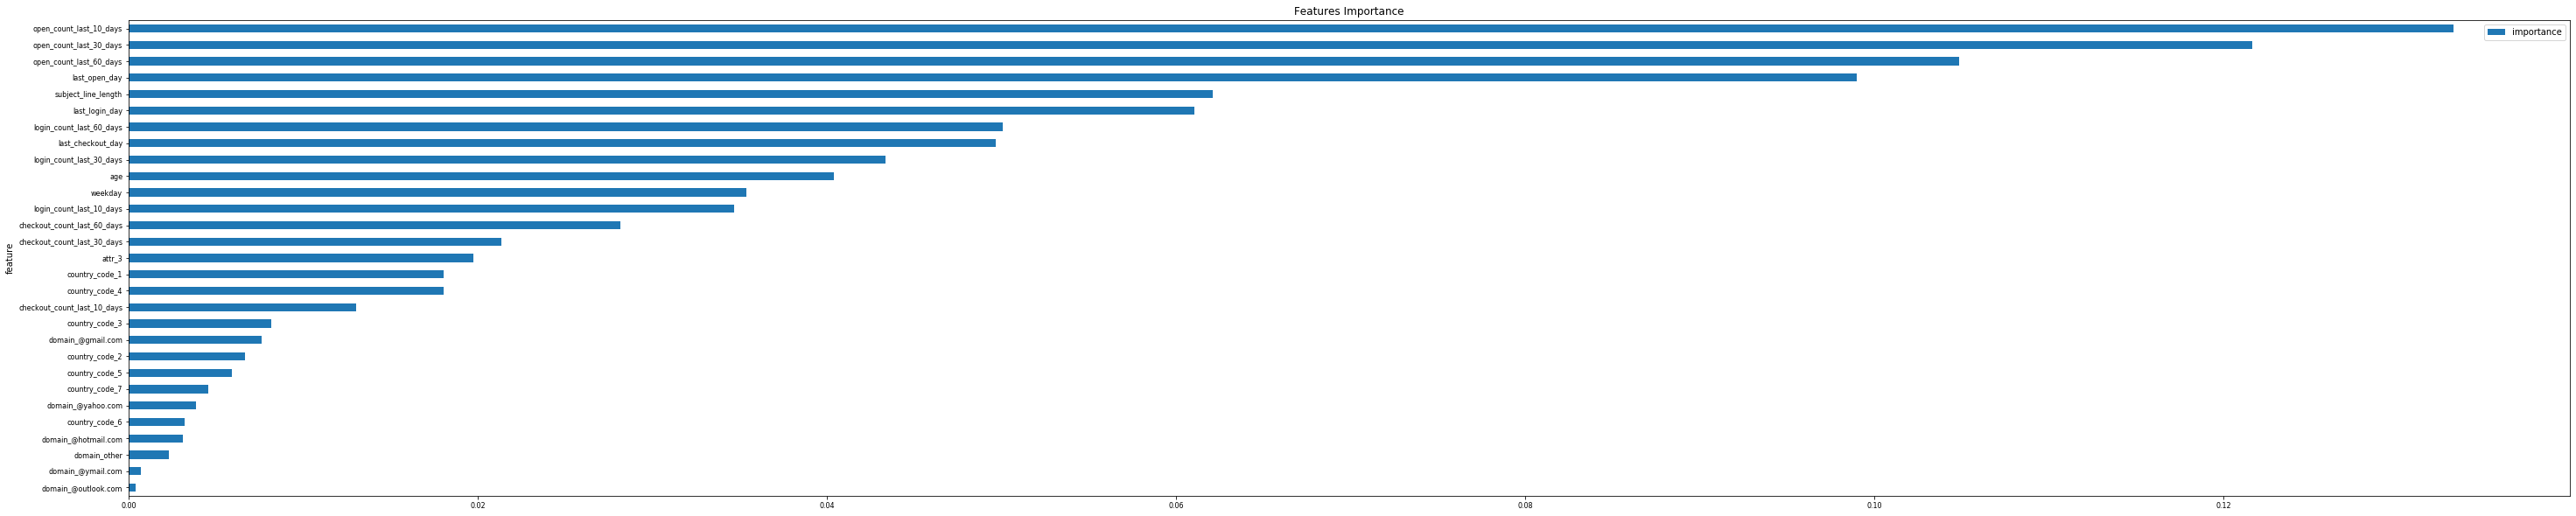

In [12]:
model = RandomForestClassifier(criterion = 'gini',max_depth = 80,max_features = 'log2', n_estimators = 1500)

classification_model_Test(model, X_train, y_train, X_test, y_test)
features_importance(model, dataset,predictor_var,outcome_var)
 

In [13]:
## We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "model/Random_Forest_trained_model_dataset7.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'model/Random_Forest_trained_model_dataset7.pkl') 


['model/Random_Forest_trained_model_dataset7.pkl']

Accuracy on training set: 1.000
Accuracy on test set: 0.971
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6227
           1       0.95      1.00      0.97      6190

    accuracy                           0.97     12417
   macro avg       0.97      0.97      0.97     12417
weighted avg       0.97      0.97      0.97     12417

*************************************************************
Metric Performance of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Confusion Matrix : 
 [[5898  329]
 [  30 6160]]
Cross Validation Score = 83.627%

Coefficient of determination:0.884
*************************************************************
open_count_last_10_days        0.137679
open_count_last_30_days        0.121555
open_count_last_60_days        0.101389
last_open_day                  0.097549
subject_line_length            0.063224
last_login_day                 0.061475
login_count_last_60_days       0.050339
last_chec

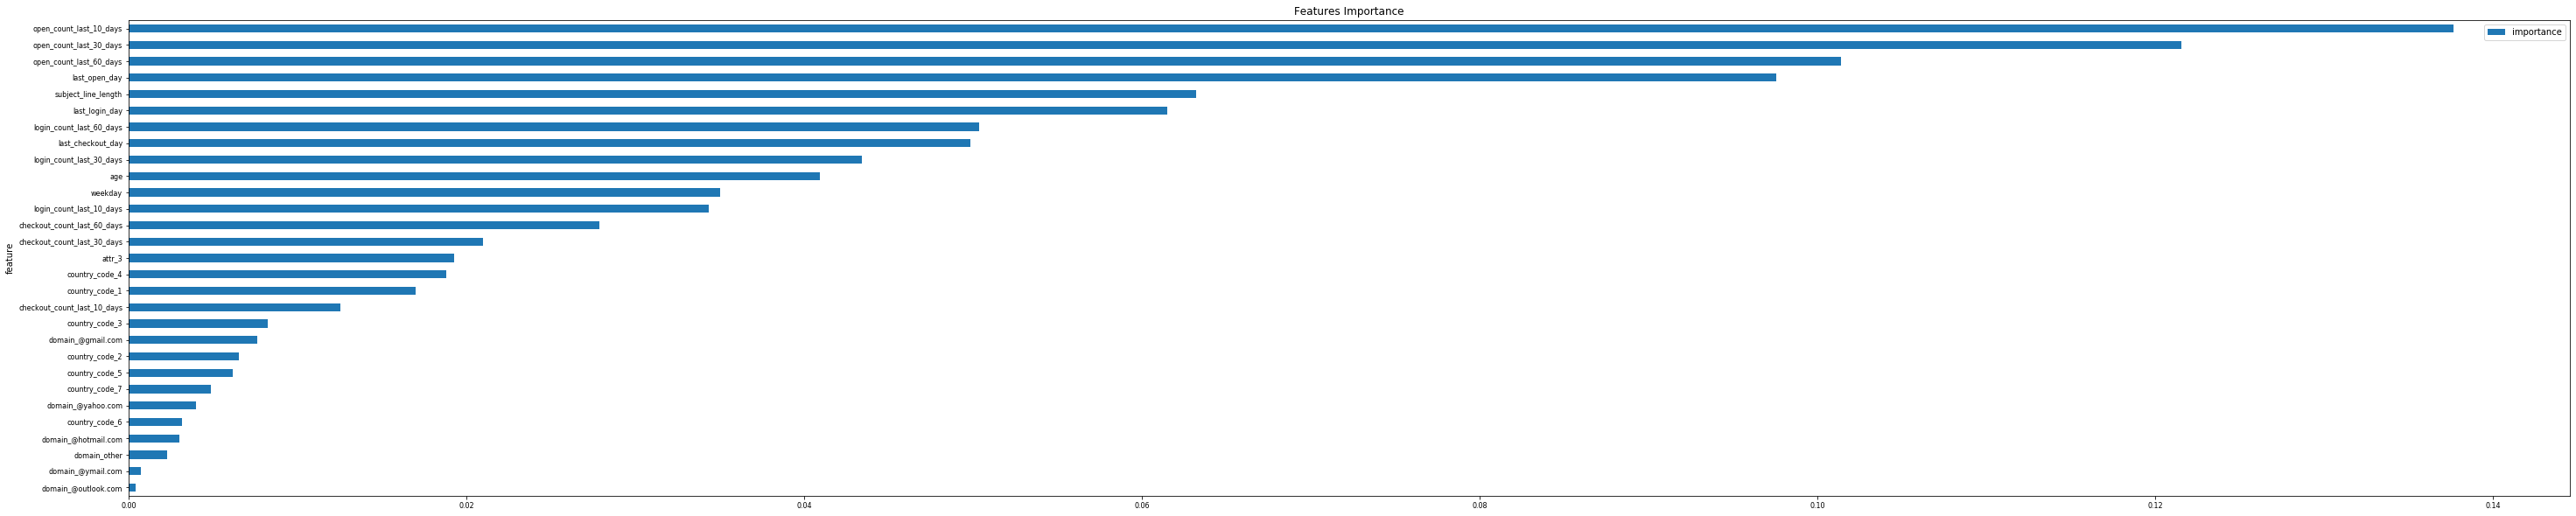

In [14]:
model = RandomForestClassifier(criterion = 'gini',max_depth = 80,max_features = 'sqrt', n_estimators = 1500)

classification_model_Test(model, X_train, y_train, X_test, y_test)
features_importance(model, dataset,predictor_var,outcome_var)

In [15]:
## We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "model/Random_Forest_trained_model2_dataset7.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'model/Random_Forest_trained_model2_dataset7.pkl') 


['model/Random_Forest_trained_model2_dataset7.pkl']

<h3>Gradient Boosting Classifier<h3>

Accuracy on training set: 1.000
Accuracy on test set: 0.978
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6227
           1       0.96      0.99      0.98      6190

    accuracy                           0.98     12417
   macro avg       0.98      0.98      0.98     12417
weighted avg       0.98      0.98      0.98     12417

*************************************************************
Metric Performance of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

Confusion Matrix : 
 [[5980  247]
 [  31 6159]]
Cross Validation Score = 83.313%

Coefficient of determination:0.910
*************************************************************
open_count_last_10_days        0.152090
open_count_last_60_days        0.125390
last_open_day                  0.103247
open_count_last_30_days        0.078563
subject_line_length            0.064053
last_login_day                 0.059943
login_count_last_60_days       0.051233
last_chec

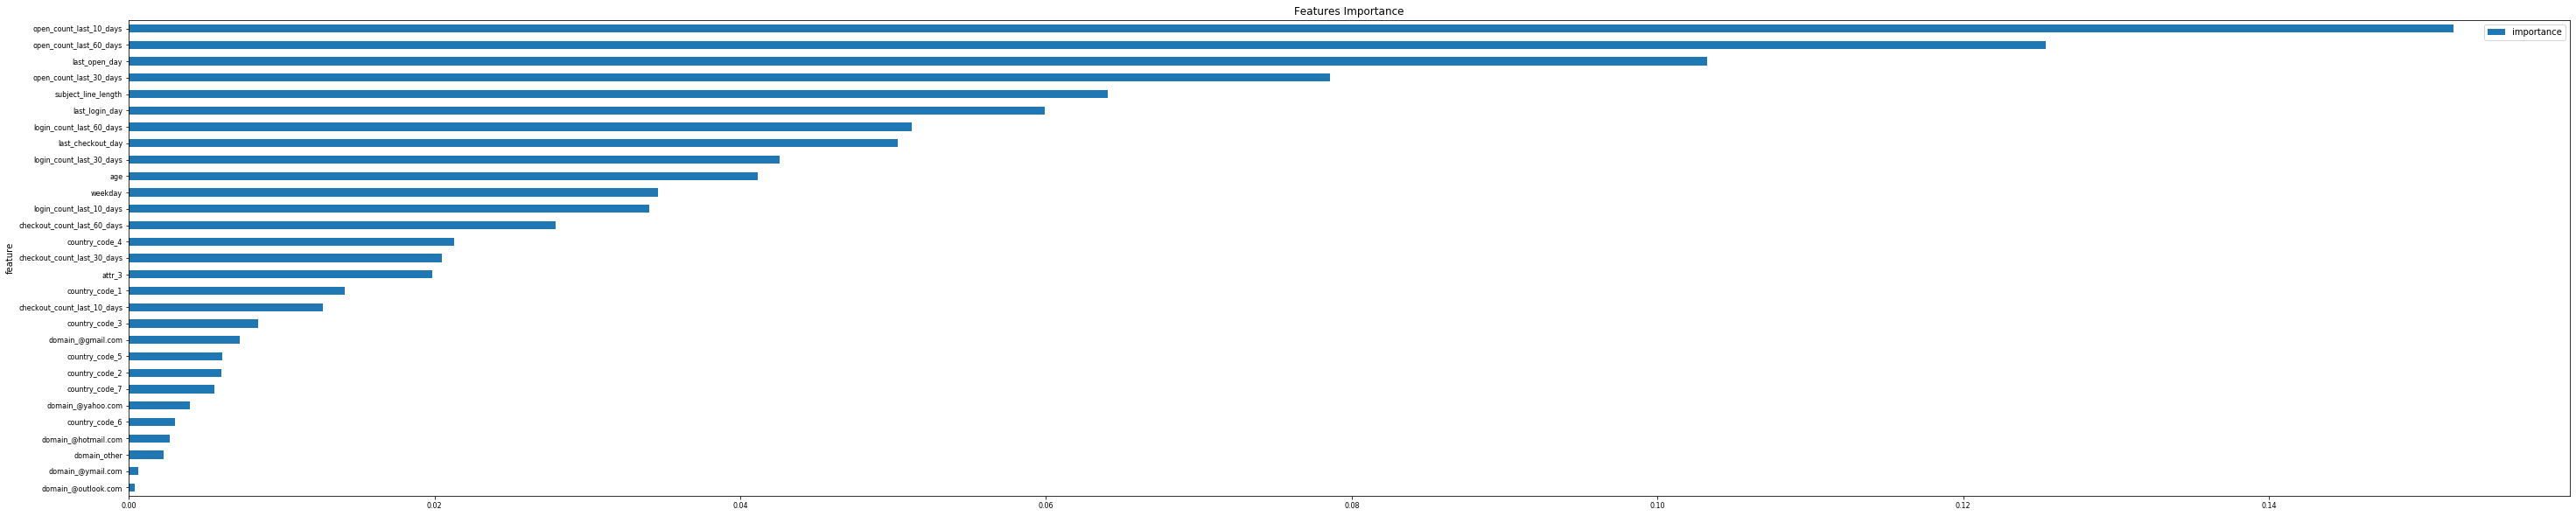

In [16]:
model = GradientBoostingClassifier(max_depth=80,n_estimators = 1500,max_features = 'sqrt',
                                   random_state=8,learning_rate=0.1)

classification_model_Test(model, X_train, y_train, X_test, y_test)
features_importance(model, dataset,predictor_var,outcome_var)

In [17]:
# We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "model/Gradient_Boosting_Classifier_trained_model_dataset7.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'model/Gradient_Boosting_Classifier_trained_model_dataset7.pkl') 

['model/Gradient_Boosting_Classifier_trained_model_dataset7.pkl']

<h3>K Nearest Neigbors KNN Model<h3>

In [19]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='distance')
classification_model_Test(model, X_train, y_train, X_test, y_test)


Accuracy on training set: 1.000
Accuracy on test set: 0.907
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      6227
           1       0.84      1.00      0.91      6190

    accuracy                           0.91     12417
   macro avg       0.92      0.91      0.91     12417
weighted avg       0.92      0.91      0.91     12417

*************************************************************
Metric Performance of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Confusion Matrix : 
 [[5086 1141]
 [  12 6178]]
Cross Validation Score = 82.878%

Coefficient of determination:0.629


In [20]:
# We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "model/KNN_trained_model_dataset7.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'model/KNN_trained_model_dataset1.pkl') 

['model/KNN_trained_model_dataset1.pkl']

<h3>Support Vector Machine Model<h3>

In [ ]:
model = SVC(C=1300, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovo', degree=3, gamma=120, kernel='rbf',
            max_iter=-1, probability=True, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
classification_model_Test(model, X_train, y_train, X_test, y_test)

In [ ]:
# We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "model/SVM_trained_model_dataset7.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'model/SVM_trained_model_dataset7.pkl') 

<h3> X Validation set <h3>

In [ ]:
xls3    = pd.ExcelFile('data/X_val_scaled_dataset7.xlsx')
X_val = pd.read_excel(xls3, 'X_val_scaled')
y_val = pd.read_excel(xls3, 'y_val')

dataset_test = X_val
dataset_test['open_flag'] = y_val['open_flag']

X_val = X_val.drop(['open_flag'],axis=1)

In [ ]:
outcome_var = 'open_flag'
predictor_var = y_val.columns

In [ ]:
dataset_test.head()

In [ ]:
X_val.count()

In [ ]:
y_val.count()

<h3>Random Forest Classifier<h3>

In [ ]:
# Load the classifier model
model = pickle.load( open( "model/Random_Forest_trained_model_dataset7.p", "rb" ) )

In [ ]:
classification_model_Val(model, X_val, y_val)

In [ ]:
# Load the classifier model
model = pickle.load( open( "model/Random_Forest_trained_model2_dataset7.p", "rb" ) )

In [ ]:
classification_model_Val(model, X_val, y_val)

<h3>Gradient Booster Classifier<h3>

In [ ]:
# Load the classifier model
model = pickle.load( open( "model/Gradient_Boosting_Classifier_trained_model_dataset7.p", "rb" ) )

In [ ]:
classification_model_Val(model, X_val, y_val)

<h3>K Nearest Neighbor<h3>

In [ ]:
# Load the classifier model
model = pickle.load( open( "model/KNN_trained_model_dataset7.p", "rb" ) )

In [ ]:
classification_model_Val(model, X_val, y_val)

<h3>Support Vector Machine<h3>

In [ ]:
# Load the classifier model
model = pickle.load( open( "model/SVM_trained_model_dataset7.p", "rb" ) )

In [ ]:
classification_model_Val(model, X_val, y_val)